In [18]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
data = load_breast_cancer()

In [19]:
# Split the data into 60% training, 20% testing and 20% validation sets
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets (60% train, 40% temp)
X_train, X_temp, y_train, y_temp = train_test_split(data.data, data.target, test_size=0.4, random_state=42)
# Split the temporary set into testing and validation sets (20% test, 20% val)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exercise-1: Data Preparation 
## 1.1 Load the dataset, inspect feature names and target distribution. Comment on dataset imbalance.

In [20]:
import pandas as pd
# Inspect feature names
print("Feature names:\n")
print(data.feature_names)
# Inspect target names
print("\nTarget names:\n")
print(data.target_names)
# Inspect datset imbalance
print("\nTarget distribution:\n")
# Create a DataFrame
y = data.target
df = pd.DataFrame({"target": y})
# Map numeric values to names
df["target_name"] = df["target"].map({0: "malignant", 1: "benign"})
print(df["target_name"].value_counts())
# Percentage distribution
print(df["target_name"].value_counts(normalize=True))

Feature names:

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names:

['malignant' 'benign']

Target distribution:

target_name
benign       357
malignant    212
Name: count, dtype: int64
target_name
benign       0.627417
malignant    0.372583
Name: proportion, dtype: float64


**Benign** cases make up about 63% of the dataset (357 samples), while **malignant** cases make up about 37% (212 samples). This indicates a moderate class imbalance.

## 1.2 Analyze all features with and without standardization (i.e., zero mean and unit variance). Plot the feature analysis with and without standardization and decide which version is more suitable. 

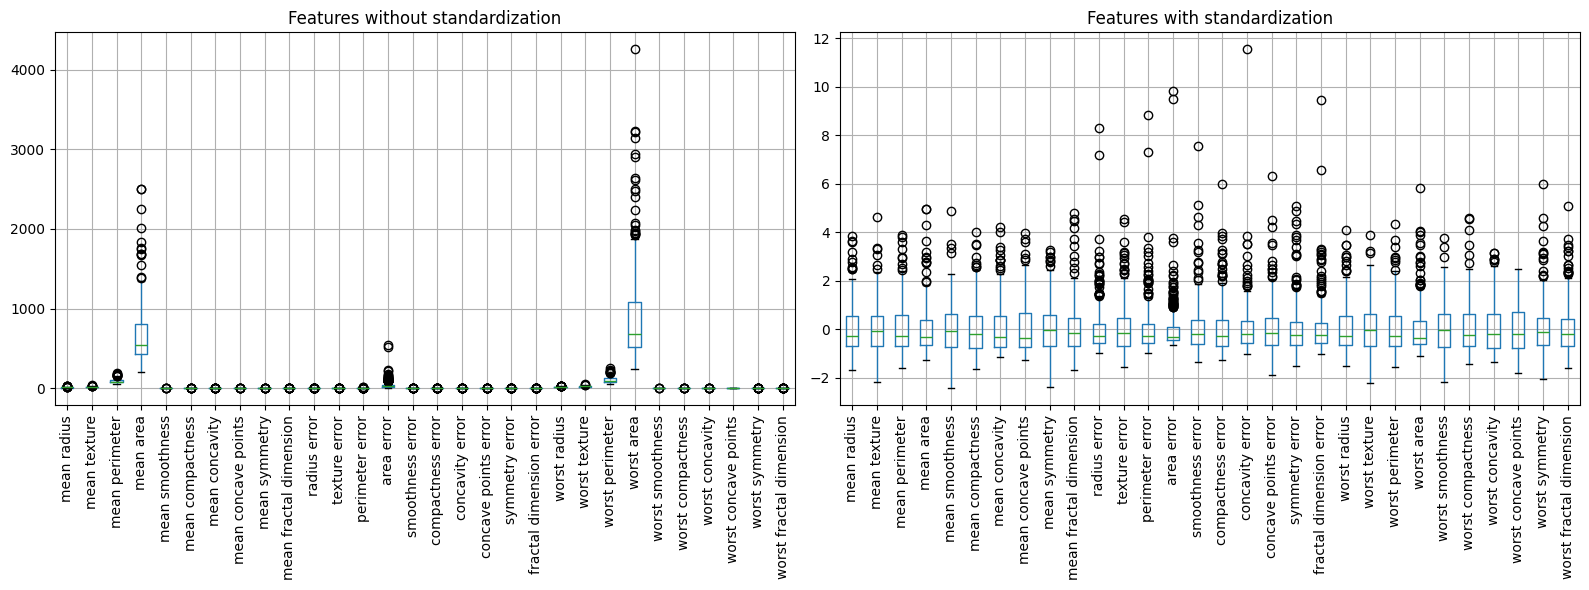

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
# X_train_scaled = (X_train - mean) / std
X_train_scaled = scaler.fit_transform(X_train)

# Create DataFrames for easier plotting
df = pd.DataFrame(X_train, columns=data.feature_names)
df_scaled = pd.DataFrame(X_train_scaled, columns=data.feature_names)

plt.figure(figsize=(16, 6))

# Raw features
plt.subplot(1, 2, 1)
df.boxplot(rot=90)
plt.title("Features without standardization")

# Standardized features
plt.subplot(1, 2, 2)
df_scaled.boxplot(rot=90)
plt.title("Features with standardization")

plt.tight_layout()
plt.show()

Standardization is the process of centering each feature by removing its mean and scaling it to unit variance.
Without standardization, features with larger scales (e.g., mean area, worst area) dominate the analysis, since their values are much higher than those of smaller-scale features.
After standardization, all features are on the same scale, so no single feature dominates purely because of its magnitude.

- Most suitable: **with standarization**

## 1.3 Comment on importance of three way split with respect to hyperparameter search and robustness of any learned model. 

The three way split refers to the splitting of the dataset into train, test and validate.
- **Training set**: this is used to fit the model (learn the weights/parameters) 
- **Validate set**: Used to tune the hyperparameters (a hyperparameter is parameter that can be set during a models learning process)
- **Test set**: Used only to evalute the model, with an unseen part of the dataset

Hyperparameter search discovers an optimal set of hyperparameters that produces the best model performance. This is done with the **Validate set**. The test set purpose is to evalute the model on unseen data. This is crucical for assessing the robustness of the model. If not for the test there would be greater risk of overfitting the hyperparameters to the test data.


# Exercise-2 Decision trees
## 2.1 Train a Decision Tree classifier using default parameters. Evaluate it on validation sets from original splits (report accuracy mean and std). 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# Build a pipeline with scaling and decision tree classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42)),
])

# Fit on training and evaluate on validation set
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
# How well does the model perform on the validation set
print(f"Validation Accuracy on the validation set: {val_accuracy:.4f}")

# Define CV strategy (5 folds, shuffled for randomness)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Run cross-validation on training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring="accuracy")
# Print results
print("Cross-validation scores:", cv_scores)
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Std accuracy: {cv_scores.std():.4f}")



Validation Accuracy: 0.9123
Cross-validation scores: [0.95652174 0.89705882 0.85294118 0.89705882 0.91176471]
Mean accuracy: 0.9031
Std accuracy: 0.0332


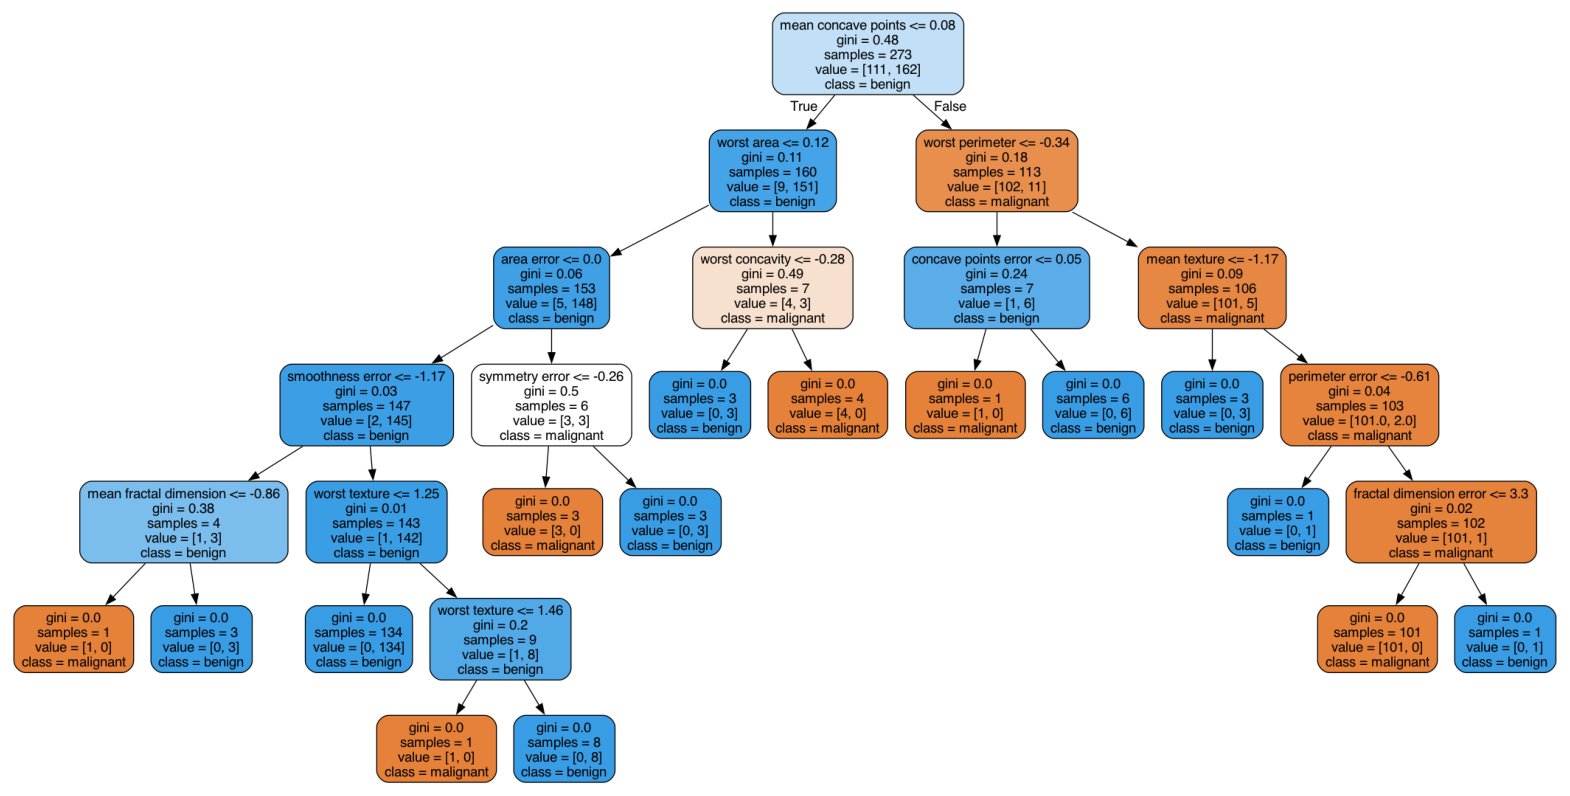

In [23]:
# Visualize the decision tree
from sklearn.tree import export_graphviz

clf = pipeline.named_steps['clf']
export_graphviz(clf, out_file="tree.dot", 
                feature_names=data.feature_names,  
                class_names=data.target_names,
                rounded=True, proportion=False, 
                precision=2, filled=True)
# To convert the .dot file to a .png file, use the command:
# dot -Tpng tree.dot -o tree.png

# Load image
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## 2.2 From the trained model, comment on feature importance values and identify the top 3 features from your model. 

In [ ]:
# Feature importance
import numpy as np
importances = clf.feature_importances_
# top 3 features
indices = np.argsort(importances)[::-1][:3]
# Print feature ranking
print("Feature ranking:")
for rank, idx in enumerate(indices):
    print(f"{rank + 1}. Feature: {data.feature_names[idx]}, Importance: {importances[idx]:.4f}")

Feature ranking:
1. Feature: mean concave points, Importance: 0.7064
2. Feature: worst concavity, Importance: 0.0846
3. Feature: worst perimeter, Importance: 0.0390


The features: mean concave points (~70%), worst concavity (~8%) and worst perimeter (~4%)are the most important features. The features with high importance dominates the model decision making. A higher importance means a stronger predictor.

## 2.3 Vary the max depth parameter (e.g., depth 2-10). Use validation accuracy (mean ± std from cross-validation on the training set) to choose the best depth. Provide performance for each chosen depth (at least 5 to be reported) and discuss the aspects of overfitting vs. underfitting.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

max_depths = range(2, 11)
results = []
# Evaluate each max_depth using cross-validation
for max_depth in max_depths:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42, max_depth=max_depth)),
    ])
    # 5-fold cross-validation on the training set
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring="accuracy")
    results.append((max_depth, cv_scores.mean(), cv_scores.std()))

# Print results
print("Max Depth  | Mean Accuracy| Std Dev")
for max_depth, mean_acc, std_acc in results:
    print(f"{max_depth:9}  | {mean_acc:.4f}       | {std_acc:.4f}")
# Choose the best max_depth based on mean accuracy
best_depth = max(results, key=lambda x: x[1])[0]
print(f"\nBest max_depth based on CV: {best_depth}")

Max Depth  | Mean Accuracy| Std Dev
        2  | 0.9150       | 0.0058
        3  | 0.9208       | 0.0074
        4  | 0.9119       | 0.0164
        5  | 0.9149       | 0.0147
        6  | 0.9060       | 0.0290
        7  | 0.9031       | 0.0332
        8  | 0.9031       | 0.0332
        9  | 0.9031       | 0.0332
       10  | 0.9031       | 0.0332

Best max_depth based on CV: 3


**Overfitting (the model is too complex)**

After some depth, we can observe that the models accuracy starts dropping and that the standard deviation increases. 

**Underfitting (the model is too simple)**

In general underfitting happens when the model is too simple and cannot capture all the patterns in the data. On the second level the model slightly underfits, since it improves on level deeper.

## 2.4 Repeat previous exercise with different min_samples_leaf values. Which setting generalizes best according to the validation set?

In [40]:
# Repeat previous exercise with different min_samples_leaf values. Which setting generalizes best according to the validation set?
min_samples_leafs = [1, 2, 4, 6, 8, 10]
results = []
# Evaluate each min_samples_leaf using cross-validation
for min_samples_leaf in min_samples_leafs:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)),
    ])
    # 5-fold cross-validation on the training set
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring="accuracy")
    results.append((min_samples_leaf, cv_scores.mean(), cv_scores.std()))

# Print results
print("Min Samples Leaf | Mean Accuracy | Std Dev")
for min_samples_leaf, mean_acc, std_acc in results:
    print(f"{min_samples_leaf:16} | {mean_acc:.4f}       | {std_acc:.4f}")
# Choose the best min_samples_leaf based on mean accuracy
best_leaf = max(results, key=lambda x: x[1])[0]
print(f"\nBest min_samples_leaf based on cross-validation: {best_leaf}")

Min Samples Leaf | Mean Accuracy | Std Dev
               1 | 0.9031       | 0.0332
               2 | 0.9149       | 0.0147
               4 | 0.8884       | 0.0381
               6 | 0.9061       | 0.0200
               8 | 0.9091       | 0.0060
              10 | 0.9033       | 0.0112

Best min_samples_leaf based on cross-validation: 2
